# Se trabaja con un set de datos descargado del sitio oficial del gobierno de la Republica Argentina, del cual se le ha filtrado sólo la información relevante a los fines del presente trabajo.

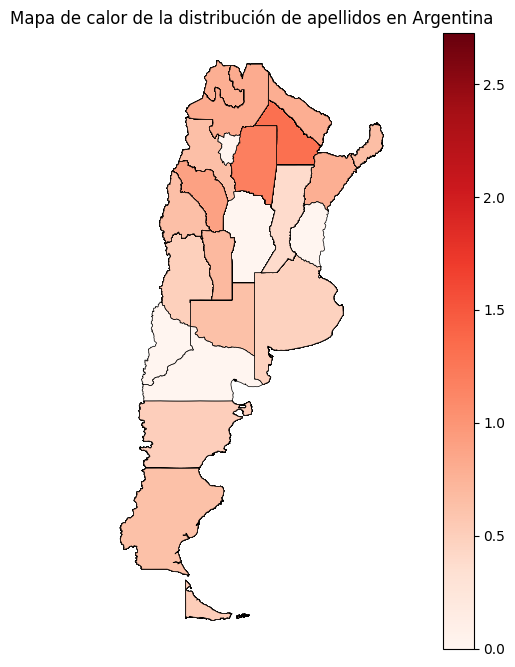

In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Cargar el dataset
df = pd.read_csv('apellidos_mas_frecuentes_provincia.csv')

# 2. Obtener la geometría de las provincias argentinas
#   (Puedes encontrar este archivo en formato GeoJSON o Shapefile)
argentina_geo = gpd.read_file('argentina-with-regions_1413.geojson')

# 3. Agrupar los datos por provincia y apellido
df_grouped = df.groupby(['provincia_nombre', 'apellido'])['porcentaje_poblacion_portadora'].mean().reset_index()

# 4. Unir los datos de frecuencia con la geometría de las provincias
df_merged = argentina_geo.merge(df_grouped, left_on='name', right_on='provincia_nombre', how='left')
df_merged['porcentaje_poblacion_portadora'] = df_merged['porcentaje_poblacion_portadora'].fillna(0)
# 5. Crear el mapa de calor
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
df_merged.plot(column='porcentaje_poblacion_portadora', ax=ax, legend=True, cmap='Reds', edgecolor='black', linewidth=0.5)

# 6. Configurar el mapa
ax.set_title('Mapa de calor de la distribución de apellidos en Argentina')
ax.set_axis_off()

# 7. Mostrar el mapa
plt.show()

# Interpretación: si una provincia tiene un color rojo intenso, significa que, en promedio, un porcentaje más alto de su población lleva los apellidos que se consideran más comunes en el dataset.

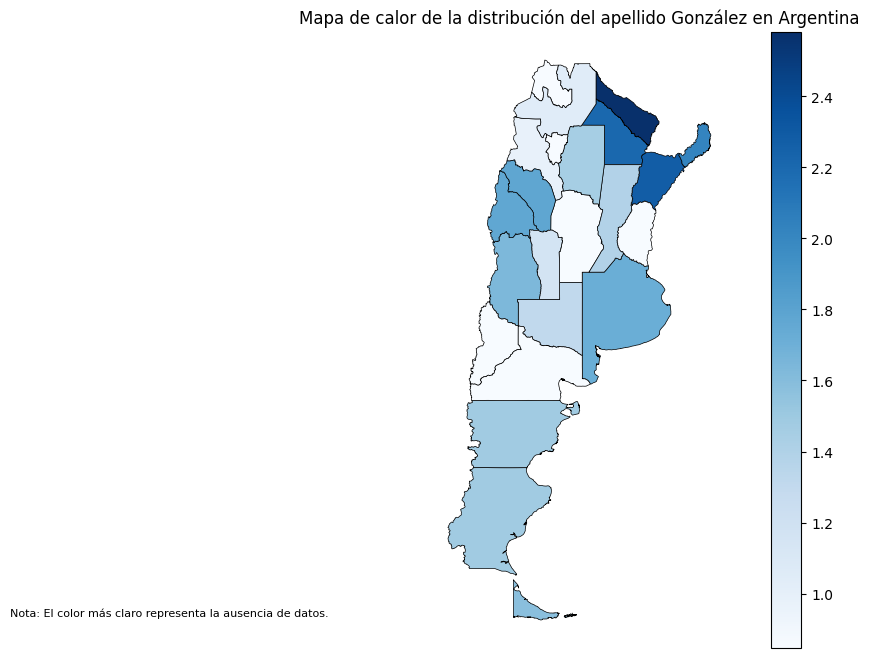

In [13]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Cargar el dataset
df = pd.read_csv('apellidos_mas_frecuentes_provincia.csv')

# 2. Obtener la geometría de las provincias argentinas
argentina_geo = gpd.read_file('argentina-with-regions_1413.geojson')

# 3. Agrupar los datos por provincia y apellido
df_grouped = df.groupby(['provincia_nombre', 'apellido'])['porcentaje_poblacion_portadora'].mean().reset_index()

# 4. Filtrar por el apellido "Diaz"
df_gon = df_grouped[df_grouped['apellido'] == 'GONZÁLEZ']

# 5. Unir los datos con el GeoDataFrame
df_merged = argentina_geo.merge(df_gon, left_on='name', right_on='provincia_nombre', how='left')

# 6. Reemplazar los valores faltantes con el valor mínimo
valor_minimo = df_merged['porcentaje_poblacion_portadora'].min()
if pd.isna(valor_minimo):
    valor_minimo = 0.01
df_merged['porcentaje_poblacion_portadora'] = df_merged['porcentaje_poblacion_portadora'].fillna(valor_minimo)

# 7. Crear el mapa de calor
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
df_merged.plot(column='porcentaje_poblacion_portadora', ax=ax, legend=True, cmap='Blues', edgecolor='black', linewidth=0.5)

# 8. Configurar el mapa
ax.set_title('Mapa de calor de la distribución del apellido González en Argentina')
ax.set_axis_off()

# 9. Agregar una nota sobre la escala de colores
plt.figtext(0.15, 0.15, "Nota: El color más claro representa la ausencia de datos.", fontsize=8)

# 10. Mostrar el mapa
plt.show()

# Aquí se puede apreciar el mapa de calor del apellido González y su distribución a lo largo y ancho del país.

# Pero ese mapa muestra la distribución del apellido mencionado en relación a la población local. Veamos la distribución nacional del mismo.

Para ello cargamos el archivo de la distribución de apellidos en cantidad de personas por provincia.

In [29]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Cargar el dataset
df = pd.read_csv('apellidos_cantidad_personas_provincia.csv')

In [30]:
df

,apellido,cantidad,provincia_id,provincia_nombre
0,GONZALEZ,315472,6,Buenos Aires
1,RODRIGUEZ,242834,6,Buenos Aires
2,GOMEZ,223400,6,Buenos Aires
3,FERNANDEZ,209765,6,Buenos Aires
4,LOPEZ,200199,6,Buenos Aires
...,...,...,...,...
321511,MANONI,10,90,Tucumán
321512,CANALS,10,90,Tucumán
321513,LLORET,10,90,Tucumán
321514,CAMPANINI,10,90,Tucumán


In [32]:
# 2. Filtrar por apellido 'GONZALEZ'
df_gon = df[df['apellido'] == 'GONZALEZ']

# Ahora df_gon contiene solo las filas con apellido 'GONZALEZ'

# Imprimir el DataFrame filtrado
print(df_gon)

        apellido  cantidad  provincia_id        provincia_nombre
0       GONZALEZ    315472             6            Buenos Aires
95134   GONZALEZ      4327            10               Catamarca
97283   GONZALEZ     29398            22                   Chaco
104886  GONZALEZ      9569            26                  Chubut
111545  GONZALEZ     43410             2  Ciudad de Buenos Aires
111581  GONZALEZ      6119             2  Ciudad de Buenos Aires
155575  GONZALEZ     28055            18              Corrientes
161573  GONZALEZ     55064            14                 Córdoba
189560  GONZALEZ     26907            30              Entre Ríos
201673  GONZALEZ     17351            34                 Formosa
204814  GONZALEZ      6775            38                   Jujuy
208789  GONZALEZ      5039            42                La Pampa
214113  GONZALEZ      7183            46                La Rioja
216397  GONZALEZ     33231            50                 Mendoza
231038  GONZALEZ     2877

In [34]:
# 3. Agrupar por provincia y sumar la cantidad
df_gon_por_provincia = df_gon.groupby('provincia_nombre')['cantidad'].sum().reset_index()

# Imprimir el DataFrame agrupado
print(df_gon_por_provincia)

          provincia_nombre  cantidad
0             Buenos Aires    315472
1                Catamarca      4327
2                    Chaco     29398
3                   Chubut      9569
4   Ciudad de Buenos Aires     49529
5               Corrientes     28055
6                  Córdoba     55064
7               Entre Ríos     26907
8                  Formosa     17351
9                    Jujuy      6775
10                La Pampa      5039
11                La Rioja      7183
12                 Mendoza     33231
13                Misiones     28777
14                 Neuquén     10366
15               Río Negro     11129
16                   Salta     15852
17                San Juan     14594
18                San Luis      6420
19              Santa Cruz      5550
20                Santa Fe     51067
21     Santiago del Estero     15804
22        Tierra del Fuego      3177
23                 Tucumán     32763


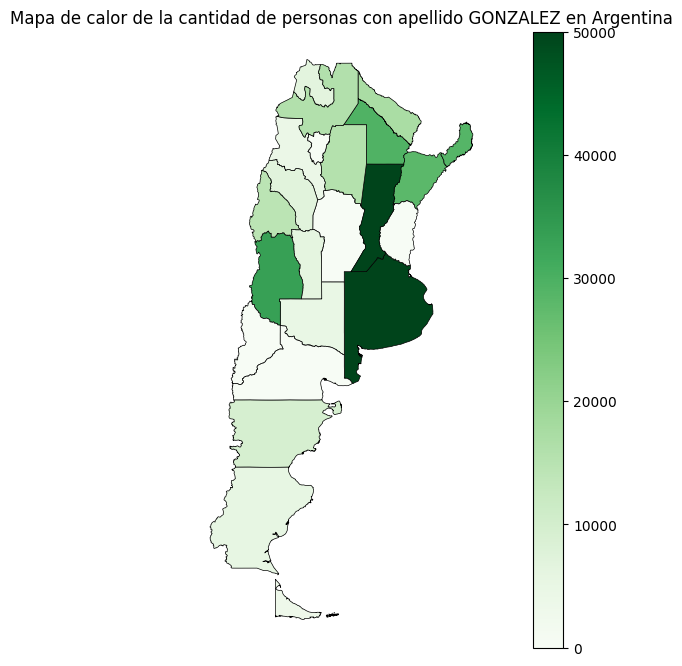

In [47]:
# 4. Obtener la geometría de las provincias argentinas
argentina_geo = gpd.read_file('argentina-with-regions_1413.geojson')

# 5. Unir los datos con el GeoDataFrame
df_merged = argentina_geo.merge(df_gon_por_provincia, left_on='name', right_on='provincia_nombre', how='left')

# 6. Completar los valores faltantes de 'cantidad' con 0
df_merged['cantidad'] = df_merged['cantidad'].fillna(0)

# 7. Crear el mapa de calor
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Asegurarse que 'geometry' es la geometría activa
df_merged = df_merged.set_geometry('geometry')

# Usar el nombre de la columna 'cantidad' para el mapa de calor
df_merged.plot(column='cantidad', ax=ax, legend=True, cmap='Greens', edgecolor='black', linewidth=0.5, vmin=0, vmax=50000)

# 8. Configurar el mapa
ax.set_title(f'Mapa de calor de la cantidad de personas con apellido GONZALEZ en Argentina')
ax.set_axis_off()

# 9. Mostrar el mapa
plt.show()

# Como puede apreciarse claramente en este nuevo mapa de calor, la distribución del apellido González cambia levemente al considerar la cantidad de personas que tienen ese apellido, en función del mapa anterior.